**REDES SOCIALES VS PRODUCTIVIDAD**

Este conjunto de datos explora cómo los hábitos digitales diarios (incluido el uso de las redes sociales, el tiempo frente a la pantalla y la exposición a notificaciones) se relacionan con la productividad, el estrés y el bienestar individual.

FUENTE: https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity?resource=download


##Librerias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor


##Archivo

In [2]:
from google.colab import files

# Subir archivo desde tu computador
uploaded = files.upload()

Saving social_media_vs_productivity.csv to social_media_vs_productivity.csv


In [3]:
df = pd.read_csv("social_media_vs_productivity.csv")
df.head(10)

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
8,40,Female,Education,4.097401,Instagram,57,5.839590,3.219022,3.004240,4.0,NaN,0.000000,10,False,True,2,10,0.000000,1.960131
9,28,Other,IT,7.595577,Twitter,64,5.888936,NaN,NaN,3.0,6.761952,1.449841,10,False,False,1,18,6.959377,6.808102


* Age: edad
* Gender: género
* job_type: Sector o estatus laboral (TI, Educación, Estudiante, etc.)
* daily_social_media_time: Tiempo promedio diario dedicado a las redes sociales (horas)
* social_platform_preference: Plataforma social más utilizada (Instagram, TikTok, Telegram, etc.)
* number_of_notifications: Número de notificaciones móviles/sociales por día
* work_hours_per_day: Promedio de horas trabajadas cada día
* perceived_productivity_score: puntuación de productividad percibida (0-10)
* actual_productivity_score: Puntuación de productividad simulada (escala: 0-10)
* stress_level: Nivel de estrés actual (escala: 1–10)
* sleep_hours: Promedio de hora de sueño por noche
* screen_time_before_sleep: tiempo gastando en pantalla antes de dormir (hora)
* breaks_during_work: Número de descansos tomados durante las horas de trabajo
* uses_focus_apps: Si el usuario utiliza aplicaciones de enfoque digital (Verdadero/Falso)
* has_digital_wellbeing_enabled: Si el Bienestar Digital está activado (Verdadero/Falso)
* coffee_consumption_per_day: Número de tazas de café consumidas al día
* days_feeling_burnout_per_month: Número de días de agotamiento reportados por mes
* weekly_offline_hours: Total de horas pasadas sin conexión cada semana (sin incluir el sueño)
* job_satisfaction_score: puntuación de satisfacción laboral


#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

##Valores nulos y duplicados

In [7]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [8]:
df.isnull().mean()*100

,0
age,0.000000
gender,0.000000
job_type,0.000000
daily_social_media_time,9.216667
social_platform_preference,0.000000
number_of_notifications,0.000000
work_hours_per_day,0.000000
perceived_productivity_score,5.380000
actual_productivity_score,7.883333
stress_level,6.346667


In [9]:
df.duplicated().sum()

np.int64(0)

## Estadísticas Descriptivas Numéricas

In [10]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


###Value.counts

In [11]:
df['daily_social_media_time'].value_counts()

,count
daily_social_media_time,
0.000000,1861
4.193643,1
1.642206,1
1.756404,1
5.777830,1
...,...
2.192677,1
1.027250,1
3.774081,1


In [12]:
df['work_hours_per_day'].value_counts()

,count
work_hours_per_day,
12.000000,175
0.000000,6
4.973371,1
8.237425,1
9.210195,1
...,...
5.724814,1
4.353834,1
5.012661,1


In [13]:
df['screen_time_before_sleep'].value_counts()

,count
screen_time_before_sleep,
0.000000,2164
3.000000,60
2.127378,1
0.511896,1
0.673885,1
...,...
0.563324,1
1.186567,1
1.024699,1


In [14]:
df['breaks_during_work'].value_counts()

,count
breaks_during_work,
2,2802
10,2760
0,2753
9,2744
4,2743
1,2732
8,2731
6,2729
3,2705


In [15]:
df['coffee_consumption_per_day'].value_counts()

,count
coffee_consumption_per_day,
2,8238
1,7894
3,5450
0,4152
4,2689
5,1124
6,326
7,94
8,29


In [16]:
df['days_feeling_burnout_per_month'].value_counts()

,count
days_feeling_burnout_per_month,
12,1015
27,986
31,981
28,972
22,971
10,971
21,967
0,966
26,966


In [17]:
df['weekly_offline_hours'].value_counts()

,count
weekly_offline_hours,
0.000000,3264
19.410370,1
11.254122,1
5.407360,1
14.490001,1
...,...
8.596405,1
7.567284,1
6.978057,1


In [18]:
df['job_satisfaction_score'].value_counts()

,count
job_satisfaction_score,
0.000000,97
10.000000,96
1.880237,1
5.990641,1
4.878645,1
...,...
2.531092,1
4.793736,1
6.738760,1


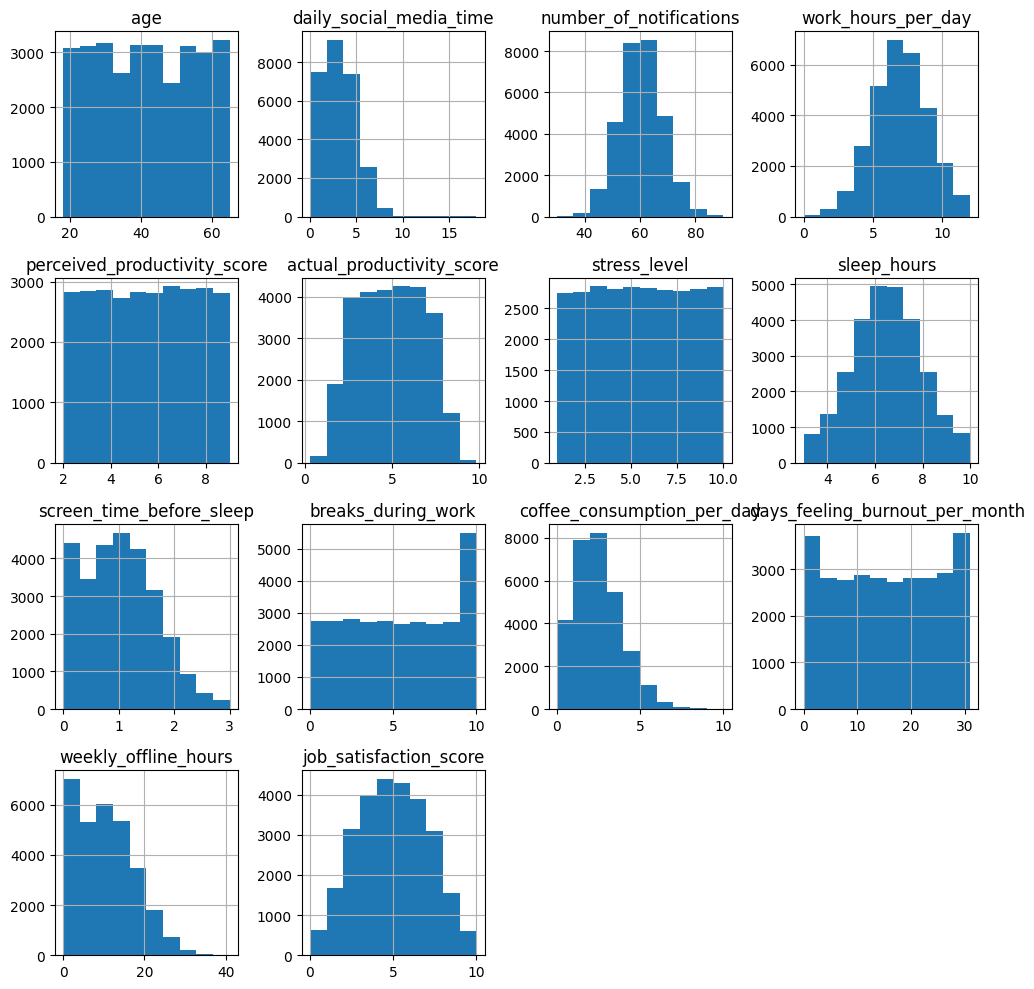

In [19]:
#Visualización de la distribución de las columnas numéricas
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

##Estadísticas Descriptivas Categóricas

In [20]:
df.describe(include='object')

,gender,job_type,social_platform_preference
count,30000,30000,30000
unique,3,6,5
top,Male,Education,TikTok
freq,14452,5055,6096


In [21]:
df['job_type'].value_counts()

,count
job_type,
Education,5055
IT,5026
Finance,5017
Student,5012
Unemployed,4958
Health,4932


In [22]:
df['social_platform_preference'].value_counts()

,count
social_platform_preference,
TikTok,6096
Telegram,6013
Instagram,6006
Twitter,5964
Facebook,5921


##Correlación entre variables numéricas

In [23]:
corr_matrix = df.corr(numeric_only=True, method = 'pearson')
corr_matrix


,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
age,1.000000,-0.002467,-0.003799,-0.003231,0.008832,0.010575,0.005436,0.002785,0.005222,-0.010918,0.001524,-0.005594,-0.001162,-0.002998,0.003086,0.014080
daily_social_media_time,-0.002467,1.000000,-0.000915,-0.003049,-0.011224,-0.010924,0.000772,0.011853,-0.004338,0.014812,-0.004950,-0.003776,-0.004093,0.002310,-0.001555,-0.004357
number_of_notifications,-0.003799,-0.000915,1.000000,0.013068,-0.003873,0.000457,-0.003084,0.004076,0.013799,0.008816,0.004320,-0.001722,0.006088,0.005248,-0.000938,-0.004716
work_hours_per_day,-0.003231,-0.003049,0.013068,1.000000,0.003925,-0.000113,0.002348,0.000939,-0.007405,-0.008151,-0.000395,0.002251,-0.003071,0.003391,-0.002061,-0.002155
perceived_productivity_score,0.008832,-0.011224,-0.003873,0.003925,1.000000,0.964319,0.002007,-0.013537,0.001789,-0.003096,-0.003870,-0.006939,0.000008,-0.011507,-0.004880,0.851342
actual_productivity_score,0.010575,-0.010924,0.000457,-0.000113,0.964319,1.000000,0.001339,-0.007868,0.002399,-0.004203,-0.001023,-0.006856,0.001156,-0.011001,-0.004839,0.882965
stress_level,0.005436,0.000772,-0.003084,0.002348,0.002007,0.001339,1.000000,0.004119,-0.001497,0.001139,0.002053,-0.011680,-0.000729,-0.000561,-0.004430,-0.000569
sleep_hours,0.002785,0.011853,0.004076,0.000939,-0.013537,-0.007868,0.004119,1.000000,-0.001583,0.005617,0.001364,0.000163,0.009729,-0.005257,-0.006997,-0.005101
screen_time_before_sleep,0.005222,-0.004338,0.013799,-0.007405,0.001789,0.002399,-0.001497,-0.001583,1.000000,-0.004316,-0.010361,0.001714,-0.003992,0.001433,-0.003042,0.005407
breaks_during_work,-0.010918,0.014812,0.008816,-0.008151,-0.003096,-0.004203,0.001139,0.005617,-0.004316,1.000000,-0.004046,0.001016,0.004647,-0.003668,0.006579,-0.003262


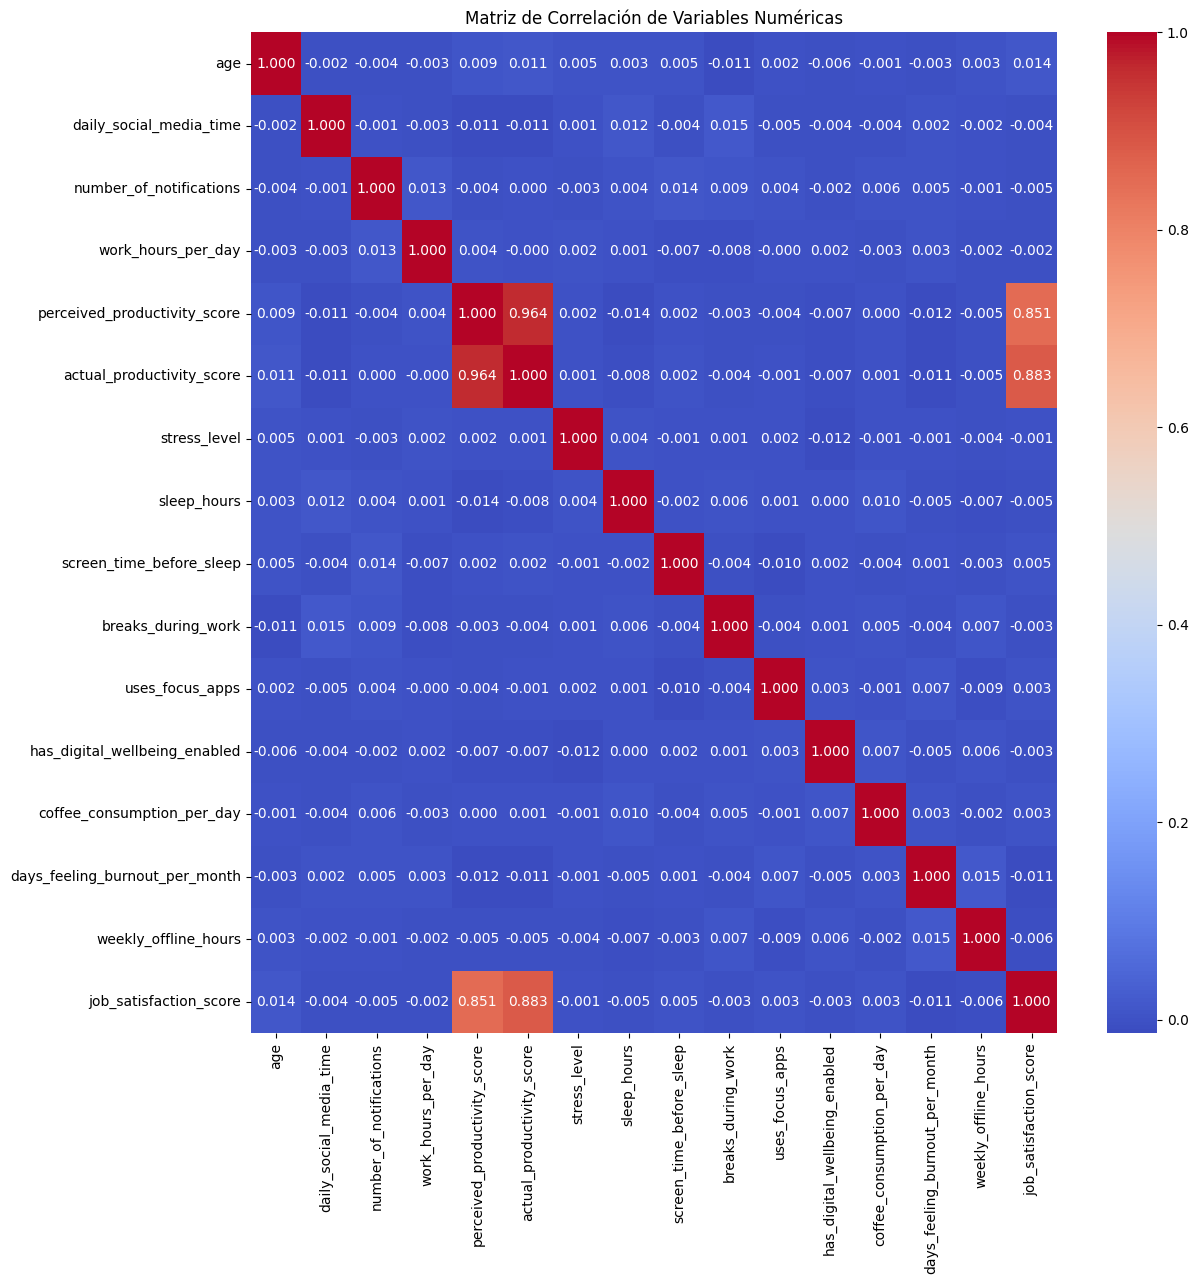

In [27]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [28]:
num_vars=df.select_dtypes(include=['int64','float64']).columns

correlacion=df[num_vars].corr(numeric_only=True, method='pearson')
correlacion

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
age,1.000000,-0.002467,-0.003799,-0.003231,0.008832,0.010575,0.005436,0.002785,0.005222,-0.010918,-0.001162,-0.002998,0.003086,0.014080
daily_social_media_time,-0.002467,1.000000,-0.000915,-0.003049,-0.011224,-0.010924,0.000772,0.011853,-0.004338,0.014812,-0.004093,0.002310,-0.001555,-0.004357
number_of_notifications,-0.003799,-0.000915,1.000000,0.013068,-0.003873,0.000457,-0.003084,0.004076,0.013799,0.008816,0.006088,0.005248,-0.000938,-0.004716
work_hours_per_day,-0.003231,-0.003049,0.013068,1.000000,0.003925,-0.000113,0.002348,0.000939,-0.007405,-0.008151,-0.003071,0.003391,-0.002061,-0.002155
perceived_productivity_score,0.008832,-0.011224,-0.003873,0.003925,1.000000,0.964319,0.002007,-0.013537,0.001789,-0.003096,0.000008,-0.011507,-0.004880,0.851342
actual_productivity_score,0.010575,-0.010924,0.000457,-0.000113,0.964319,1.000000,0.001339,-0.007868,0.002399,-0.004203,0.001156,-0.011001,-0.004839,0.882965
stress_level,0.005436,0.000772,-0.003084,0.002348,0.002007,0.001339,1.000000,0.004119,-0.001497,0.001139,-0.000729,-0.000561,-0.004430,-0.000569
sleep_hours,0.002785,0.011853,0.004076,0.000939,-0.013537,-0.007868,0.004119,1.000000,-0.001583,0.005617,0.009729,-0.005257,-0.006997,-0.005101
screen_time_before_sleep,0.005222,-0.004338,0.013799,-0.007405,0.001789,0.002399,-0.001497,-0.001583,1.000000,-0.004316,-0.003992,0.001433,-0.003042,0.005407
breaks_during_work,-0.010918,0.014812,0.008816,-0.008151,-0.003096,-0.004203,0.001139,0.005617,-0.004316,1.000000,0.004647,-0.003668,0.006579,-0.003262


In [29]:
num_vars=df.select_dtypes(include=['int64','float64']).columns

correlacion=df[num_vars].corr(numeric_only=True, method='spearman')
correlacion

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
age,1.000000,-0.003666,-0.004915,-0.003191,0.008852,0.010574,0.005449,0.000458,0.005108,-0.010928,0.000533,-0.002985,0.004034,0.014448
daily_social_media_time,-0.003666,1.000000,0.001341,-0.001046,-0.008337,-0.006598,0.002970,0.010396,-0.004484,0.009773,-0.003105,0.002846,-0.001782,-0.001573
number_of_notifications,-0.004915,0.001341,1.000000,0.011242,-0.004332,-0.000244,-0.002872,0.004278,0.012177,0.007889,0.003526,0.005271,-0.001764,-0.005018
work_hours_per_day,-0.003191,-0.001046,0.011242,1.000000,0.004901,0.002265,0.002122,0.001684,-0.008105,-0.007067,-0.004247,0.005492,-0.002666,-0.002420
perceived_productivity_score,0.008852,-0.008337,-0.004332,0.004901,1.000000,0.966748,0.001952,-0.013440,0.000512,-0.003177,0.000147,-0.011539,-0.005606,0.860200
actual_productivity_score,0.010574,-0.006598,-0.000244,0.002265,0.966748,1.000000,0.001877,-0.008640,0.000201,-0.004277,0.000189,-0.010951,-0.006235,0.889248
stress_level,0.005449,0.002970,-0.002872,0.002122,0.001952,0.001877,1.000000,0.002937,-0.002240,0.001153,-0.000597,-0.000536,-0.005087,0.000931
sleep_hours,0.000458,0.010396,0.004278,0.001684,-0.013440,-0.008640,0.002937,1.000000,-0.002555,0.006670,0.011735,-0.006838,-0.007578,-0.006424
screen_time_before_sleep,0.005108,-0.004484,0.012177,-0.008105,0.000512,0.000201,-0.002240,-0.002555,1.000000,-0.003516,-0.003125,0.000090,-0.003520,0.003612
breaks_during_work,-0.010928,0.009773,0.007889,-0.007067,-0.003177,-0.004277,0.001153,0.006670,-0.003516,1.000000,0.004390,-0.003617,0.008305,-0.002641


## Visualización de la distribución de job satisfaction score

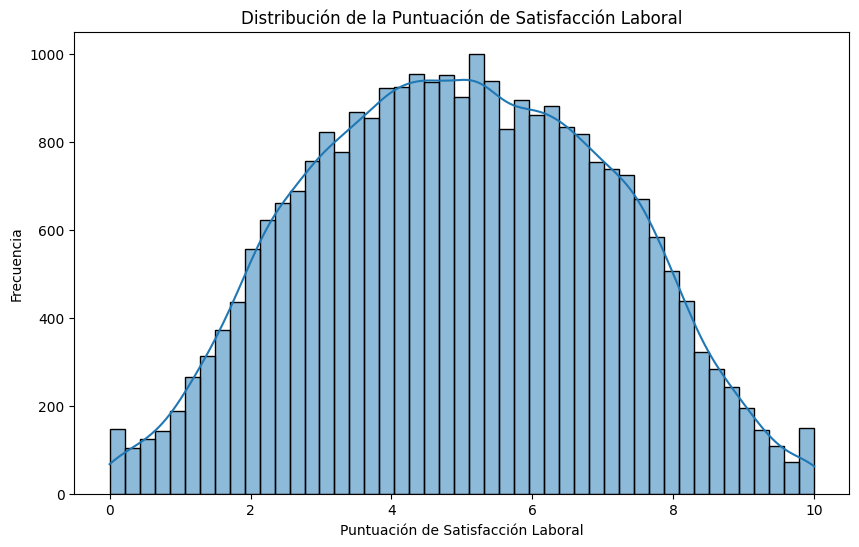

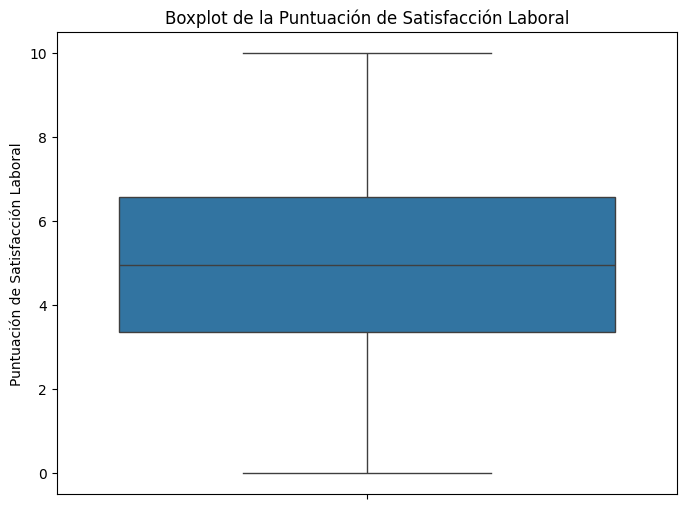

In [30]:
# Histograma de la puntuación de satisfacción laboral
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='job_satisfaction_score', kde=True)
plt.title('Distribución de la Puntuación de Satisfacción Laboral')
plt.xlabel('Puntuación de Satisfacción Laboral')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de la puntuación de satisfacción laboral
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='job_satisfaction_score')
plt.title('Boxplot de la Puntuación de Satisfacción Laboral')
plt.ylabel('Puntuación de Satisfacción Laboral')
plt.show()

## Visualización bivariada Joint Plots


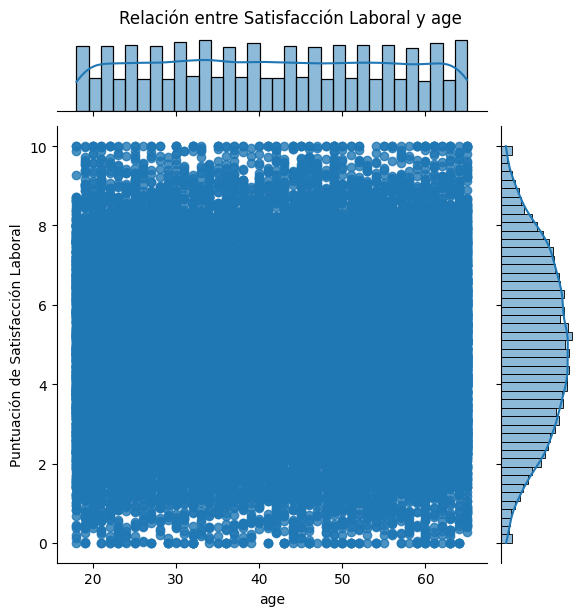

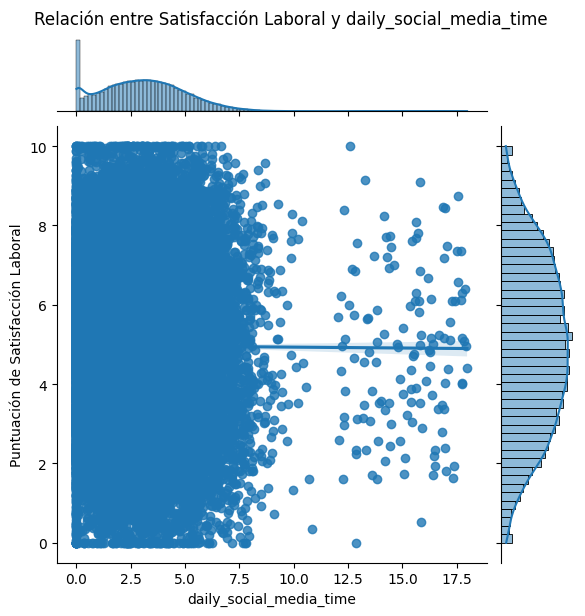

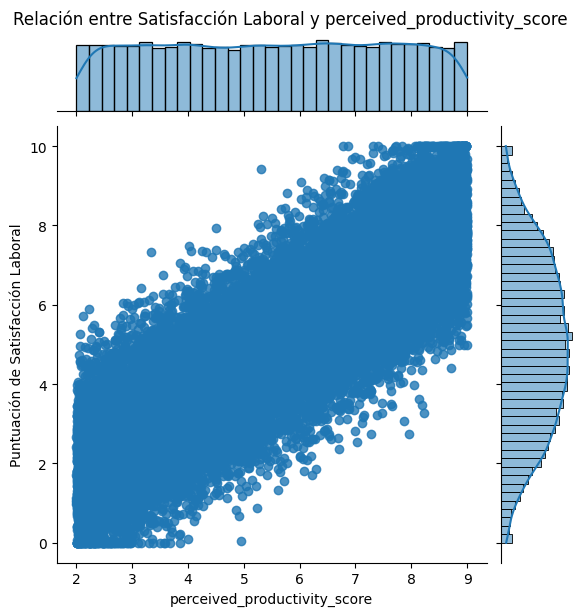

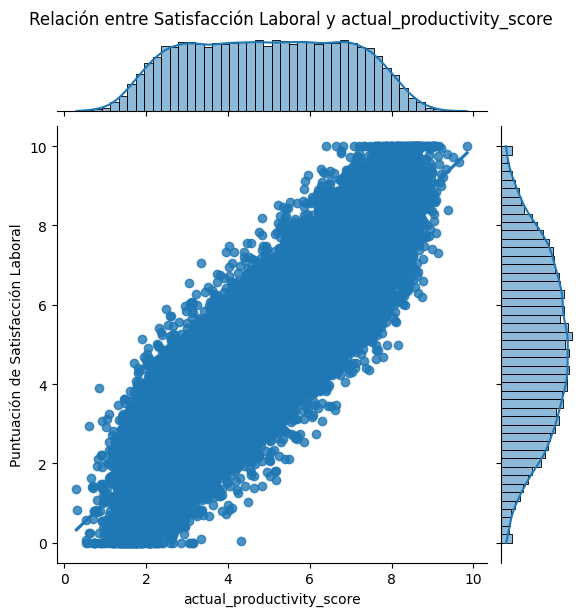

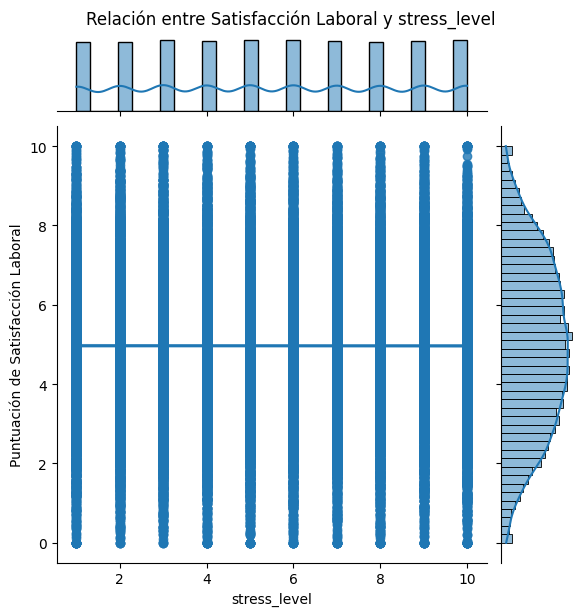

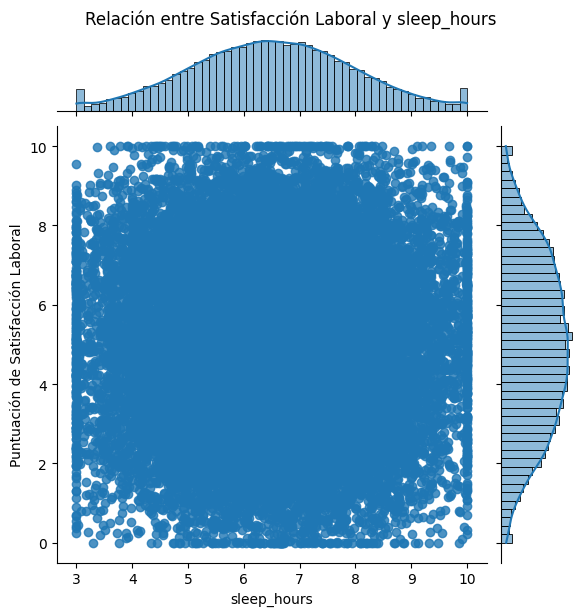

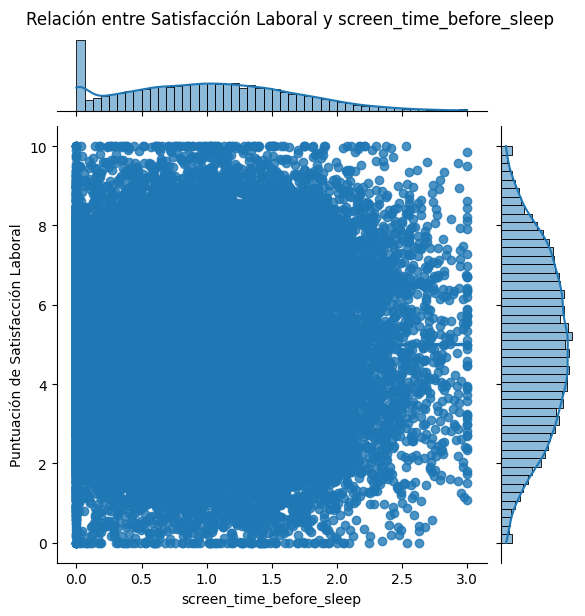

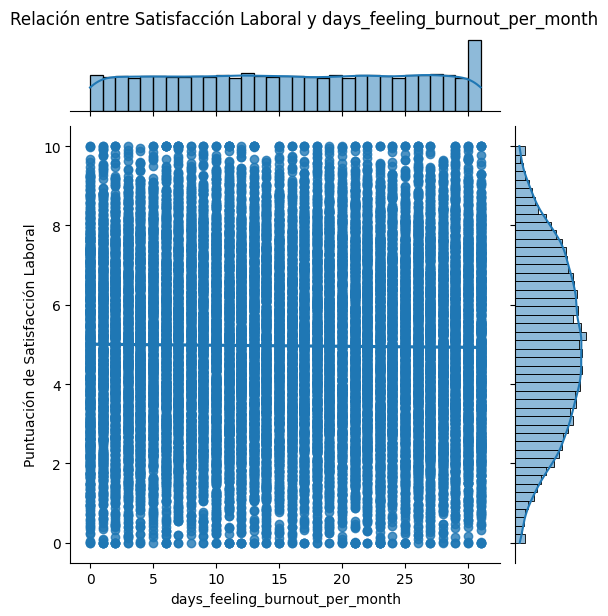

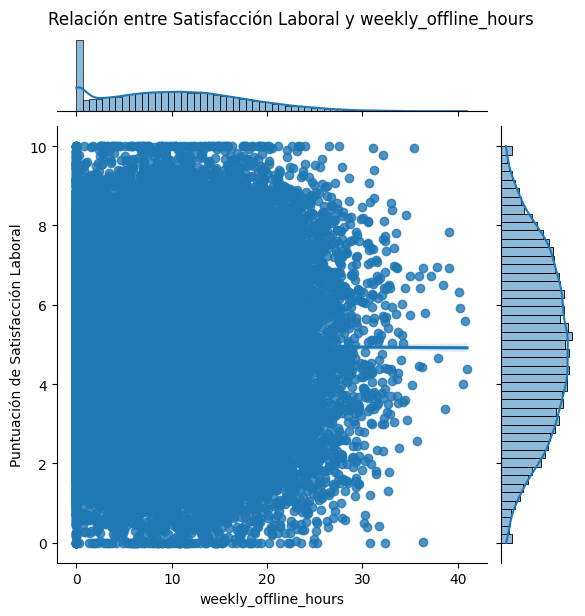

In [31]:
numerical_cols_to_plot = [
    'age',
    'daily_social_media_time',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours'
]

for col in numerical_cols_to_plot:
    sns.jointplot(data=df, x=col, y='job_satisfaction_score', kind='reg')
    plt.suptitle(f'Relación entre Satisfacción Laboral y {col}', y=1.02)
    plt.xlabel(col)
    plt.ylabel('Puntuación de Satisfacción Laboral')
    plt.show()

## Identificación de valores atípicos


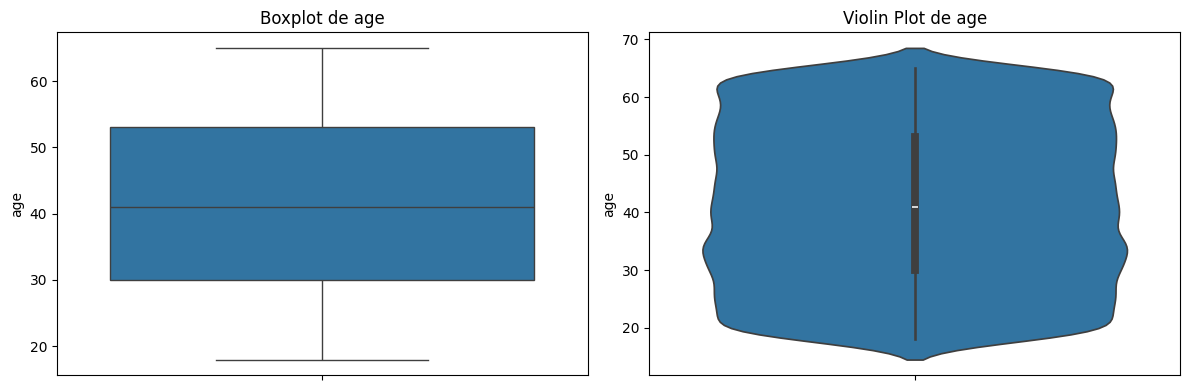

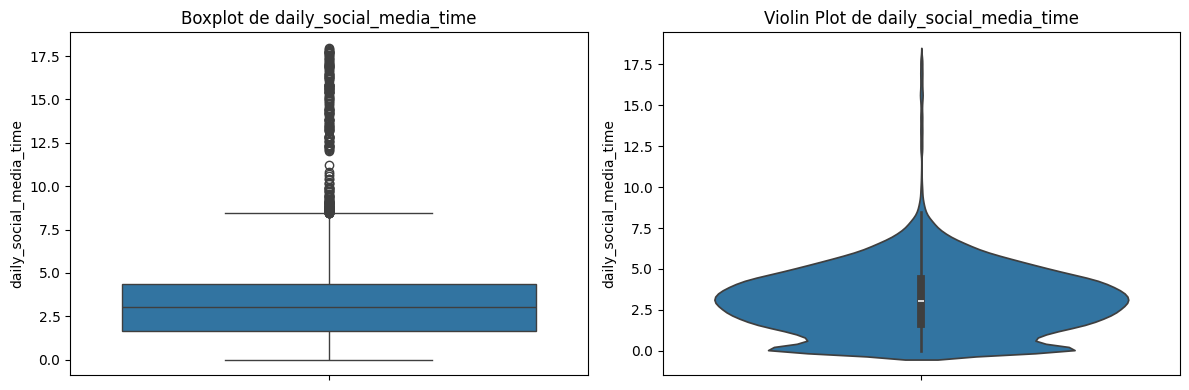

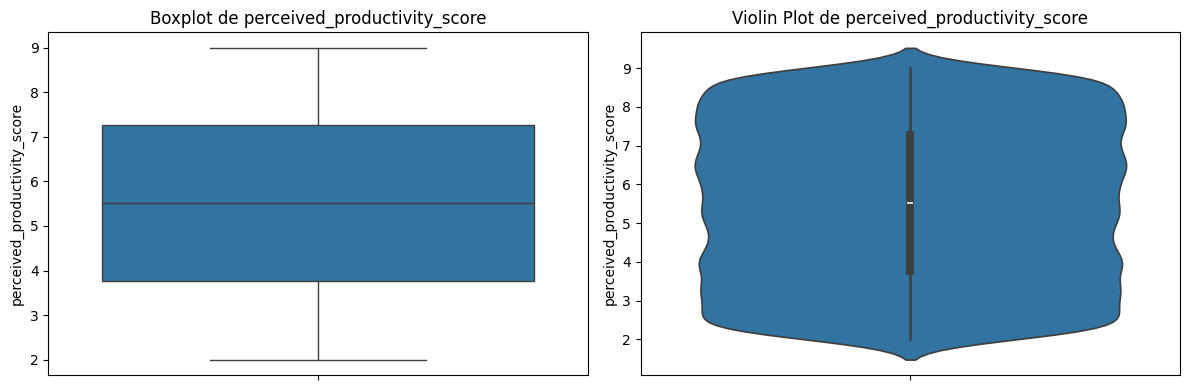

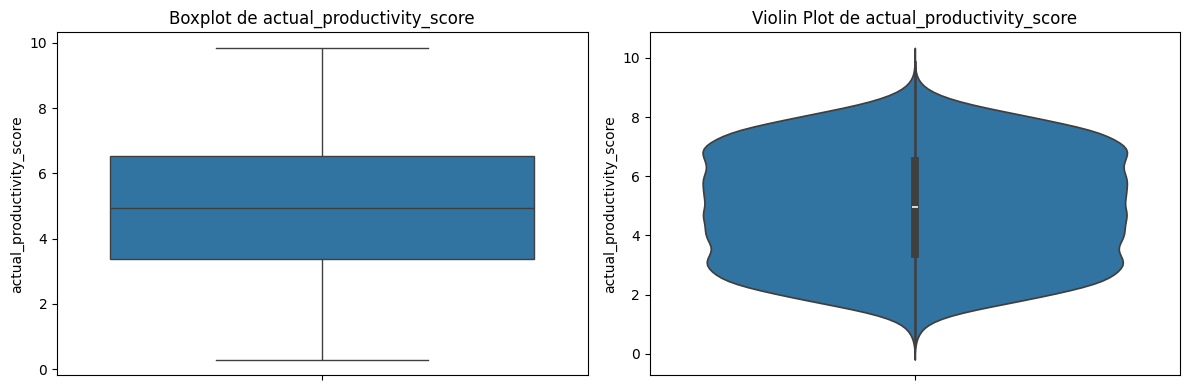

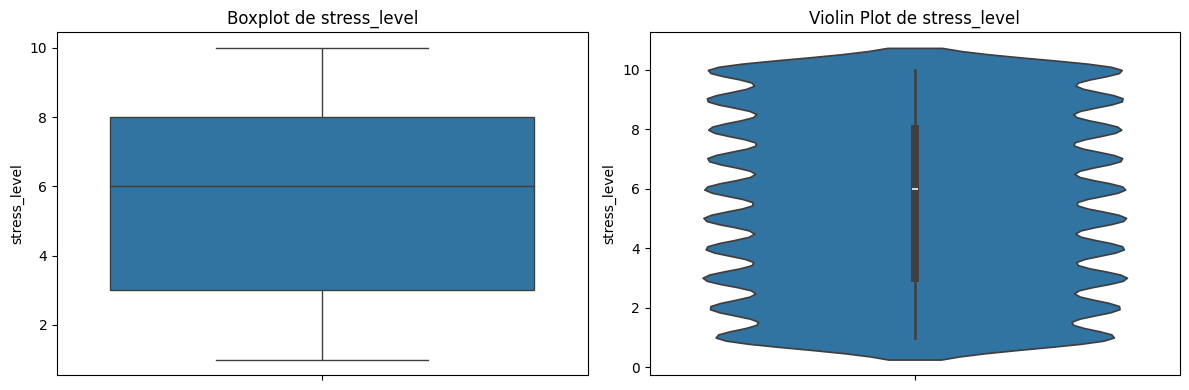

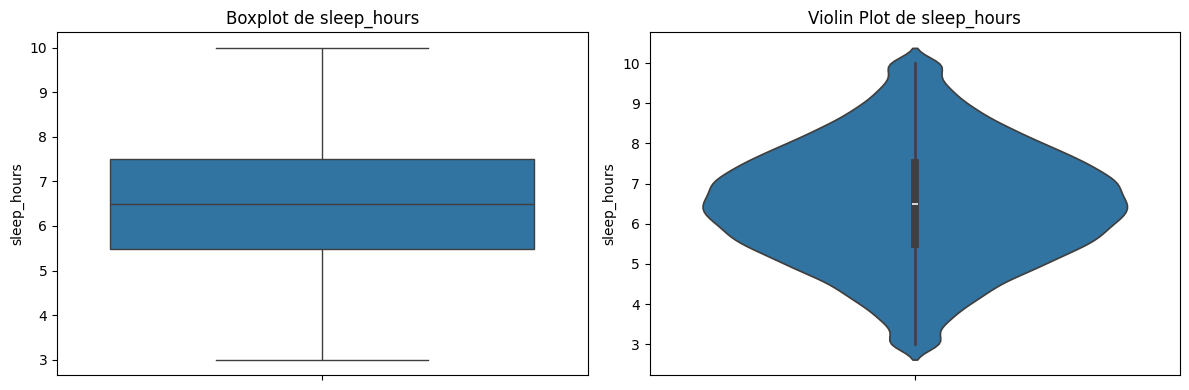

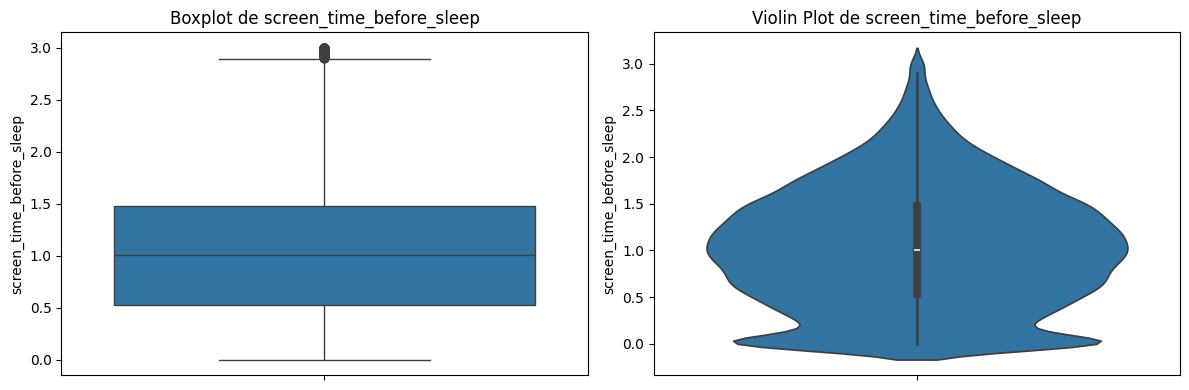

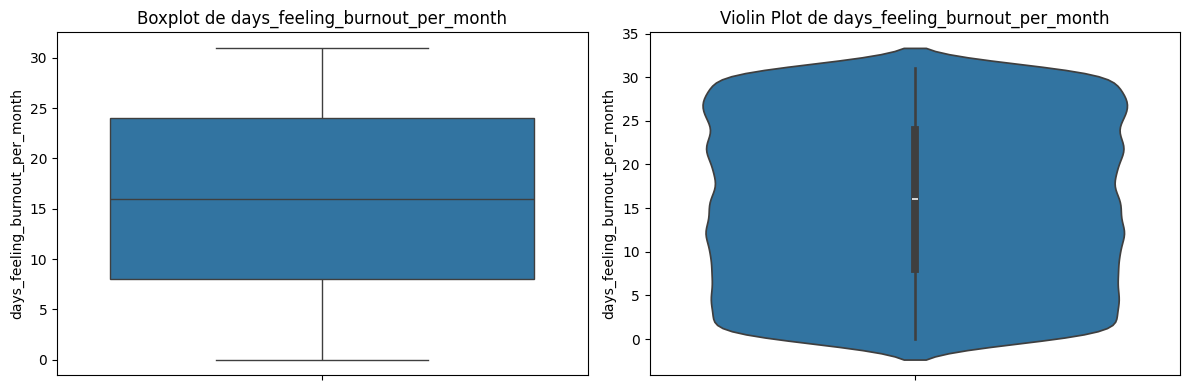

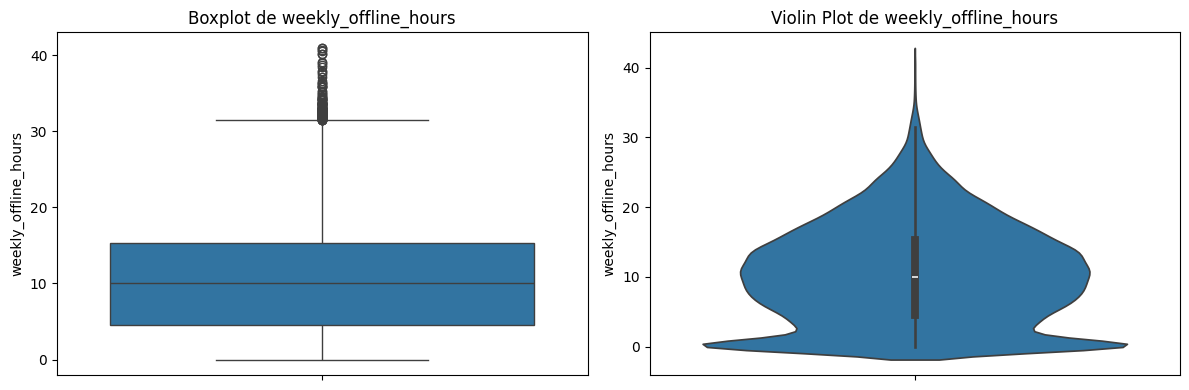

In [32]:
# Identify numerical columns with notable correlation
# Based on the correlation matrix, stress_level, actual_productivity_score,
# perceived_productivity_score, daily_social_media_time, sleep_hours, screen_time_before_sleep,
# days_feeling_burnout_per_month, and weekly_offline_hours show some level of correlation with job_satisfaction_score.
# We will focus on those with relatively higher absolute correlation values.

correlated_numerical_cols = [
    'age',
    'daily_social_media_time',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours'
]

# Visualize distribution and outliers using boxplots and violin plots
for col in correlated_numerical_cols:
    # Create a figure with two subplots (one for boxplot, one for violin plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 1 row, 2 columns

    # Boxplot on the first subplot
    sns.boxplot(data=df, y=col, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col}')
    axes[0].set_ylabel(col)

    # Violin plot on the second subplot
    sns.violinplot(data=df, y=col, ax=axes[1])
    axes[1].set_title(f'Violin Plot de {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

## Resumen del Análisis Exploratorio de Datos (EDA)

Este EDA tuvo como objetivo explorar el conjunto de datos "social_media_vs_productivity" para identificar factores que podrían influir en la puntuación de satisfacción laboral (`job_satisfaction_score`). A continuación, se presentan los hallazgos clave:

**Información General y Limpieza de Datos:**

*   El conjunto de datos contiene 30,000 entradas y 19 columnas con información sobre hábitos digitales, productividad, estrés, bienestar y satisfacción laboral.
*   Se identificaron valores nulos en varias columnas numéricas, incluyendo `daily_social_media_time`, `perceived_productivity_score`, `actual_productivity_score`, `stress_level`, `sleep_hours`, `screen_time_before_sleep` y `job_satisfaction_score`. No se encontraron filas duplicadas. Para las visualizaciones bivariadas con variables numéricas, se manejaron los nulos eliminando las filas correspondientes para cada par de variables.
*   Las columnas categóricas (`gender`, `job_type`, `social_platform_preference`) no presentan valores nulos.

**Estadísticas Descriptivas:**

*   El análisis estadístico de las variables numéricas proporcionó información sobre su distribución central, dispersión y rango. Por ejemplo, la edad promedio es de aproximadamente 41 años, el tiempo diario promedio en redes sociales es de alrededor de 3.1 horas, y la puntuación promedio de satisfacción laboral es cercana a 5.0.
*   Las estadísticas descriptivas de las variables categóricas mostraron la distribución de las respuestas. El género más frecuente es "Male", el tipo de trabajo más común es "Education", y la plataforma social preferida es "TikTok".

**Visualización de la Distribución de `job_satisfaction_score`:**

*   El histograma y el boxplot de `job_satisfaction_score` mostraron que la distribución de la satisfacción laboral tiende a ser aproximadamente simétrica y centrada alrededor de la media. El boxplot también permitió visualizar la dispersión y la presencia de posibles valores atípicos en la puntuación de satisfacción laboral.

**Correlación entre Variables Numéricas:**

*   La matriz de correlación reveló las relaciones lineales entre las variables numéricas. Se observaron correlaciones notables (positivas o negativas) entre `job_satisfaction_score` y variables como `perceived_productivity_score`, `actual_productivity_score`, `stress_level`, `days_feeling_burnout_per_month`, y en menor medida, `sleep_hours`.

**Visualización Bivariada (Variables Numéricas):**

*   Los joint plots ayudaron a visualizar la relación entre `job_satisfaction_score` y otras variables numéricas.
    *   Se observó una tendencia general de mayor satisfacción laboral con mayores puntuaciones de productividad percibida y real.
    *   Se apreció una tendencia de menor satisfacción laboral con mayores niveles de estrés y más días sintiendo agotamiento.
    *   La relación con otras variables como el tiempo en redes sociales, horas de sueño, tiempo en pantalla antes de dormir y horas offline semanales fue menos clara en estas visualizaciones bivariadas, aunque la matriz de correlación indicó algunas correlaciones leves.

**Identificación de Valores Atípicos:**

*   Los boxplots y violin plots para las variables numéricas clave permitieron identificar la presencia y distribución de valores atípicos. Algunas variables como `daily_social_media_time`, `screen_time_before_sleep`, y `weekly_offline_hours` mostraron una mayor dispersión y presencia de valores extremos, lo cual se reflejó en las "colas" de los violin plots y los puntos fuera de los "bigotes" de los boxplots.


**Conclusiones del EDA:**

Basado en este análisis exploratorio, los factores que parecen tener una influencia más notable en la puntuación de satisfacción laboral incluyen:

*   **Puntuación de Productividad Percibida y Real:** Existe una correlación positiva, sugiriendo que sentirse y ser realmente más productivo se asocia con una mayor satisfacción laboral.
*   **Nivel de Estrés y Días de Agotamiento:** Existe una correlación negativa, indicando que un mayor estrés y más días de agotamiento están relacionados con una menor satisfacción laboral.
*   **Tipo de Trabajo y Plataforma Social Preferida:** Las diferencias en las puntuaciones promedio de satisfacción laboral entre las categorías sugieren que el sector laboral y la plataforma social más utilizada también pueden ser factores influyentes.

Otras variables numéricas mostraron correlaciones más débiles o distribuciones con valores atípicos que podrían requerir un manejo específico en la modelización.

#IMPUTACIÓN DE DATOS

In [33]:
df_copy=df.copy()

In [34]:
df_copy['daily_social_media_time'] = df_copy['daily_social_media_time'].fillna(df_copy['daily_social_media_time'].median())
df_copy['perceived_productivity_score'] = df_copy['perceived_productivity_score'].fillna(df_copy['perceived_productivity_score'].median())
df_copy['actual_productivity_score'] = df_copy['actual_productivity_score'].fillna(df_copy['actual_productivity_score'].median())
df_copy['stress_level'] = df_copy['stress_level'].fillna(df_copy['stress_level'].median())
df_copy['sleep_hours'] = df_copy['sleep_hours'].fillna(df_copy['sleep_hours'].median())
df_copy['screen_time_before_sleep'] = df_copy['screen_time_before_sleep'].fillna(df_copy['screen_time_before_sleep'].median())
df_copy['job_satisfaction_score'] = df_copy['job_satisfaction_score'].fillna(df_copy['job_satisfaction_score'].median())

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         30000 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    30000 non-null  float64
 8   actual_productivity_score       30000 non-null  float64
 9   stress_level                    30000 non-null  float64
 10  sleep_hours                     30000 non-null  float64
 11  screen_time_before_sleep        30000 non-null  float64
 12  breaks_during_work              

##REVISIÓN DE OUTLIERS

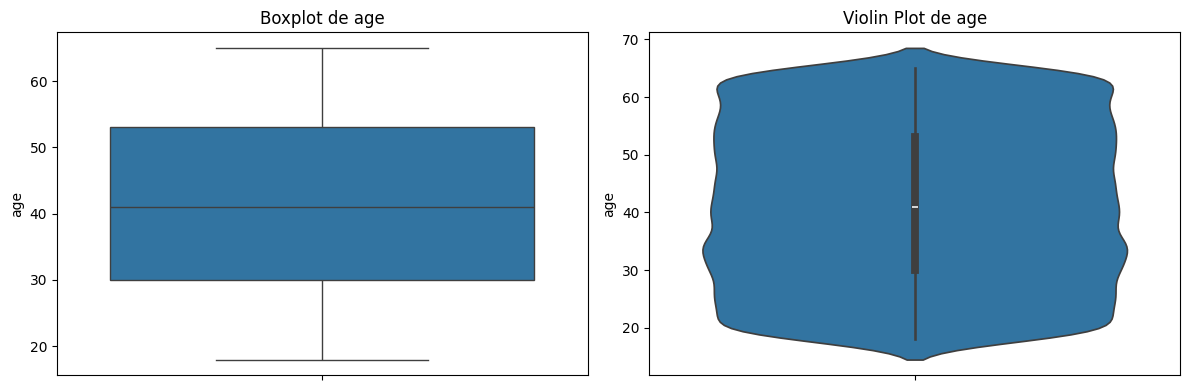

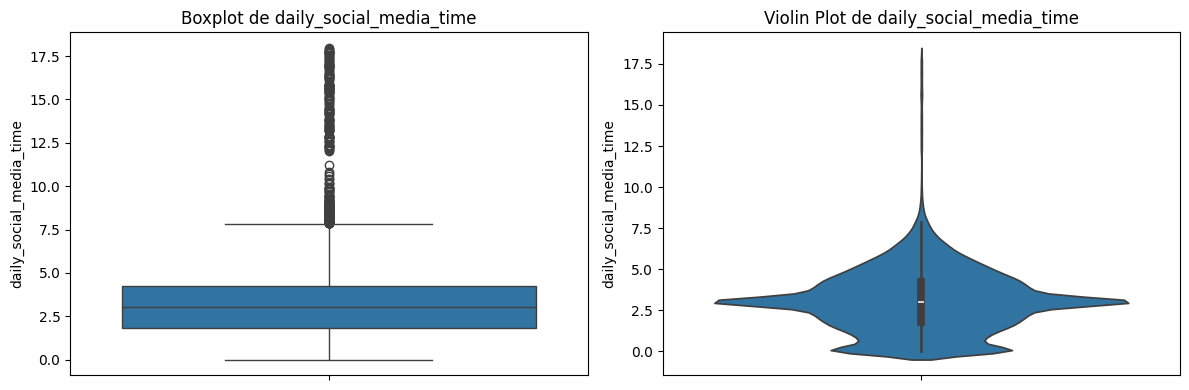

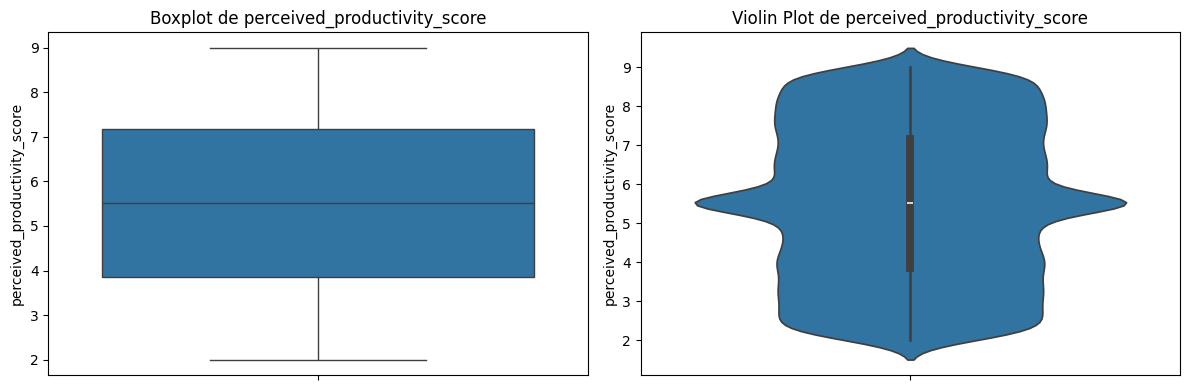

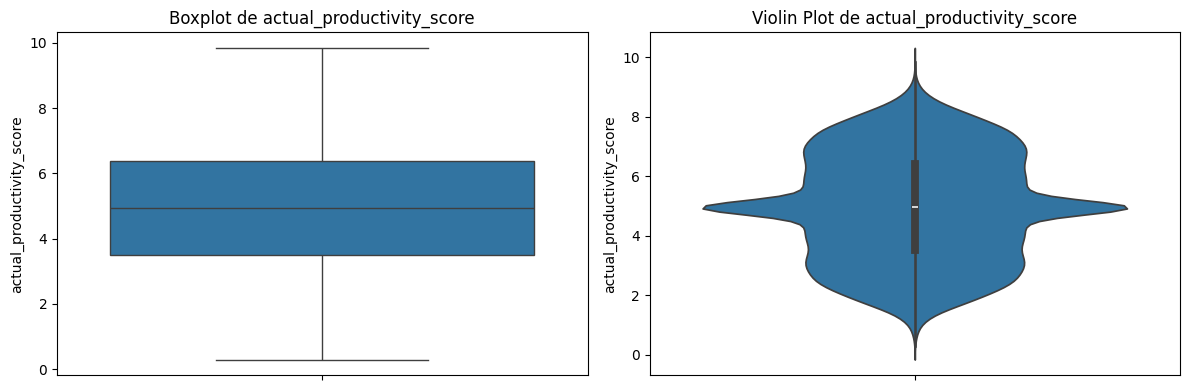

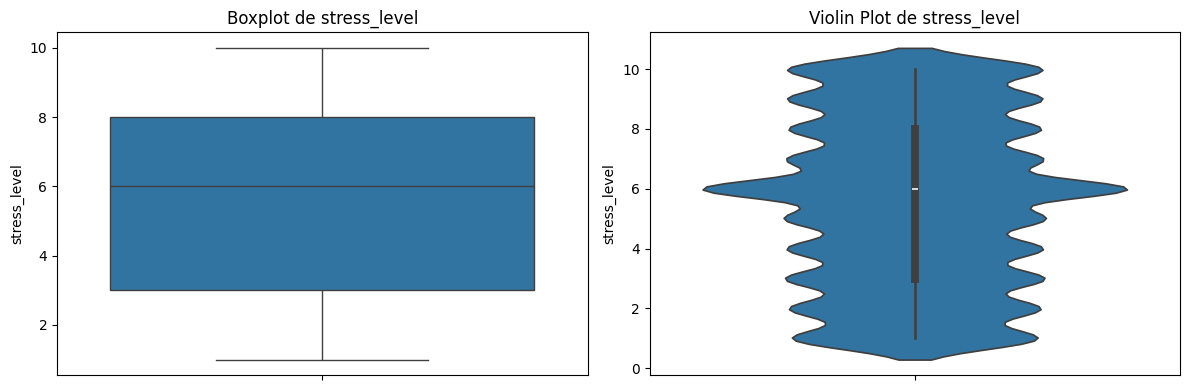

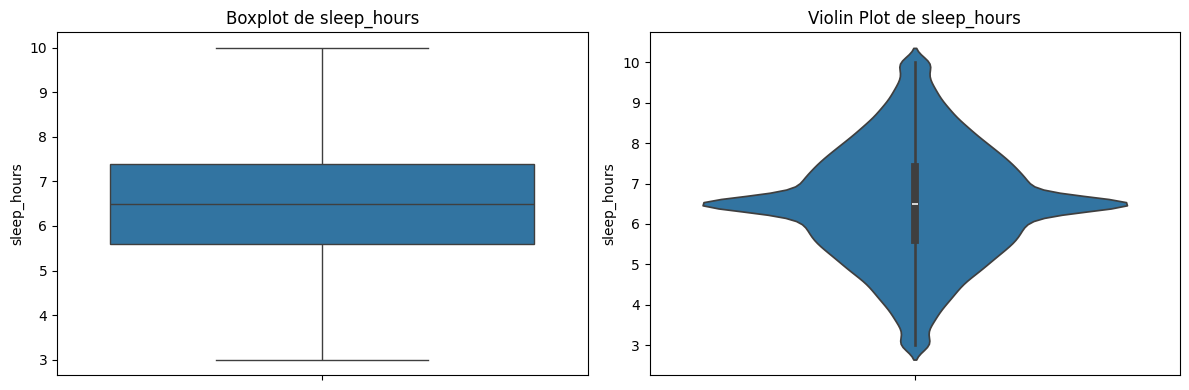

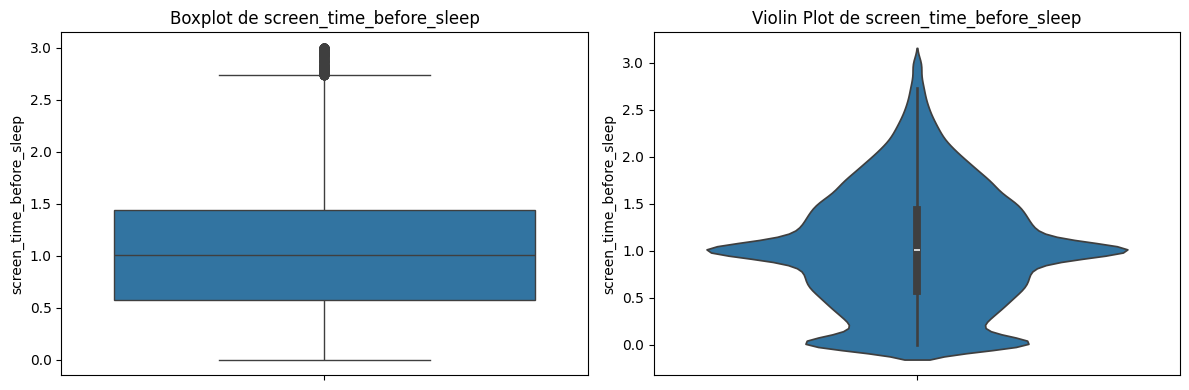

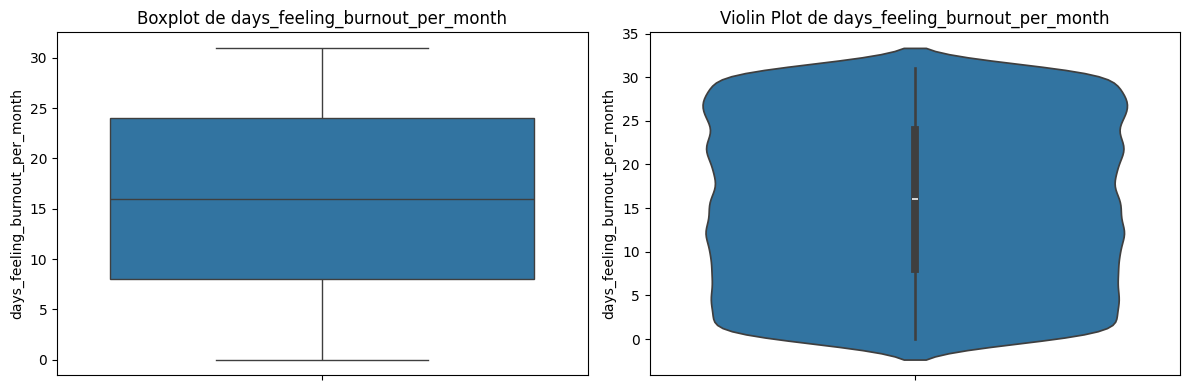

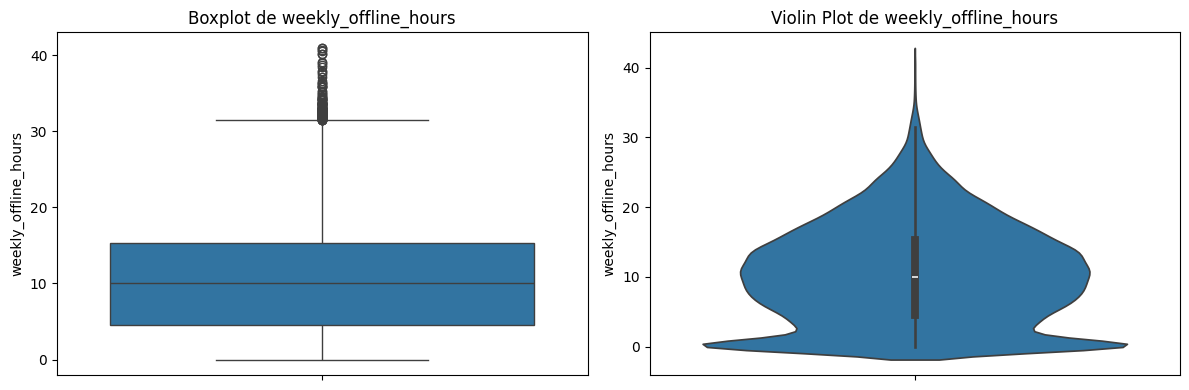

In [36]:
correlated_numerical_cols = [
    'age',
    'daily_social_media_time',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours'
]

# Visualize distribution and outliers using boxplots and violin plots
for col in correlated_numerical_cols:
    # Create a figure with two subplots (one for boxplot, one for violin plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 1 row, 2 columns

    # Boxplot on the first subplot
    sns.boxplot(data=df_copy, y=col, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col}')
    axes[0].set_ylabel(col)

    # Violin plot on the second subplot
    sns.violinplot(data=df_copy, y=col, ax=axes[1])
    axes[1].set_title(f'Violin Plot de {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

##TRATAMIENTO DE OUTLIERS

In [37]:
# Apply log1p transformation to skewed columns
df_copy['daily_social_media_time_transformed'] = np.log1p(df_copy['daily_social_media_time'])
df_copy['screen_time_before_sleep_transformed'] = np.log1p(df_copy['screen_time_before_sleep'])
df_copy['weekly_offline_hours_transformed'] = np.log1p(df_copy['weekly_offline_hours'])

# Display the head of the dataframe with the new transformed columns
display(df_copy[['daily_social_media_time', 'daily_social_media_time_transformed',
                 'screen_time_before_sleep', 'screen_time_before_sleep_transformed',
                 'weekly_offline_hours', 'weekly_offline_hours_transformed']].head())

,daily_social_media_time,daily_social_media_time_transformed,screen_time_before_sleep,screen_time_before_sleep_transformed,weekly_offline_hours,weekly_offline_hours_transformed
0,4.180940,1.644986,0.419102,0.350025,21.927072,3.132318
1,3.249603,1.446826,0.671519,0.513733,0.000000,0.000000
2,3.025913,1.392752,0.624378,0.485125,10.322044,2.426752
3,3.025913,1.392752,1.204540,0.790519,23.876616,3.213928
4,3.025913,1.392752,1.876254,1.056489,10.653519,2.455608


##NORMALIZACIÓN DE DATOS CON MinMaxScaler

In [38]:
# Define the list of numerical columns to normalize, including the transformed ones
numerical_cols_to_normalize = [
    'age',
    'daily_social_media_time_transformed', # Use the transformed column
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep_transformed', # Use the transformed column
    'days_feeling_burnout_per_month',
    'weekly_offline_hours_transformed' # Use the transformed column
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
df_copy[numerical_cols_to_normalize] = scaler.fit_transform(df_copy[numerical_cols_to_normalize])

# Display the head of the dataframe with the normalized columns
display(df_copy[numerical_cols_to_normalize].head())

,age,daily_social_media_time_transformed,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep_transformed,days_feeling_burnout_per_month,weekly_offline_hours_transformed
0,0.808511,0.558943,0.862995,0.732476,0.333333,0.302364,0.252489,0.354839,0.838229
1,0.595745,0.491611,0.437643,0.509797,0.666667,0.300557,0.370580,0.806452,0.000000
2,0.297872,0.473237,0.265963,0.332715,0.333333,0.797603,0.349944,0.548387,0.649414
3,0.893617,0.473237,0.130885,0.154779,0.555556,0.436141,0.570239,0.129032,0.860068
4,0.148936,0.473237,0.981337,0.487455,0.666667,0.343672,0.762095,0.967742,0.657137


#REGRESIÓN LINEAL MÚLTIPLE

PREGUNTA: Cuáles factores influyen sobre la puntuación de satisfacción laboral

In [39]:
df_regre=df_copy.copy()

In [40]:
#Preparar los datos

X= df_regre[['age',
    'daily_social_media_time_transformed',
    'perceived_productivity_score',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep_transformed',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours_transformed']]

y= df_regre['job_satisfaction_score']

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)

(22500, 9)


In [41]:
#Modelo de regresión lineal

#Creación del modelo
regressor = LinearRegression(fit_intercept = True)

#Entrenamiento con los datos
regressor.fit(X_train, y_train)

print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [ 5.66501283e-02  2.37610855e-02  2.34899907e+00  5.51705248e+00
 -2.65519839e-02  3.92399750e-02  1.14087056e-02 -6.74928419e-04
  9.71381307e-03], el intersecto (A) es 1.040431025241042


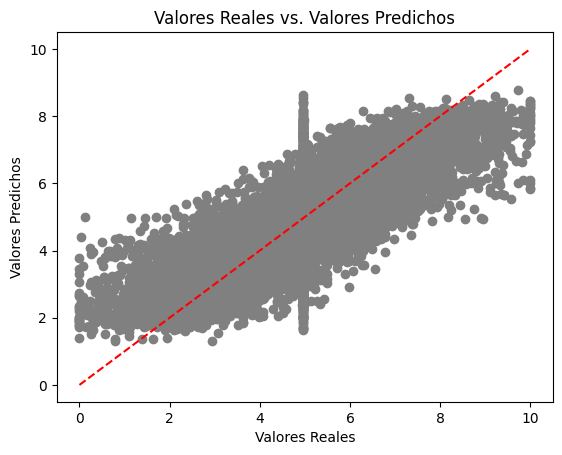

In [42]:
#Evaluación del modelo
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

##Métricas

In [43]:
# Evaluar el modelo

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE excluding zero values in y_test
# Create a boolean mask to identify non-zero values in y_test
non_zero_mask = y_test != 0

# Filter y_test and y_pred using the mask
y_test_non_zero = y_test[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

# Calculate MAPE on the filtered data
mape = mean_absolute_percentage_error(y_test_non_zero, y_pred_non_zero)

r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"El error absoluto medio (MAE) es: {mae}")
print(f"El Error Porcentual Absoluto Medio (MAPE) (excluyendo ceros en valores reales) es: {mape:.2f}%")
print(f"Coeficiente de Determinación (R-squared): {r2}")

Error Cuadrático Medio (MSE): 1.3566969605175967
Raíz del error cuadrático medio (RMSE): 1.1647733515657013
El error absoluto medio (MAE) es: 0.9193788069400045
El Error Porcentual Absoluto Medio (MAPE) (excluyendo ceros en valores reales) es: 0.33%
Coeficiente de Determinación (R-squared): 0.666668788904748


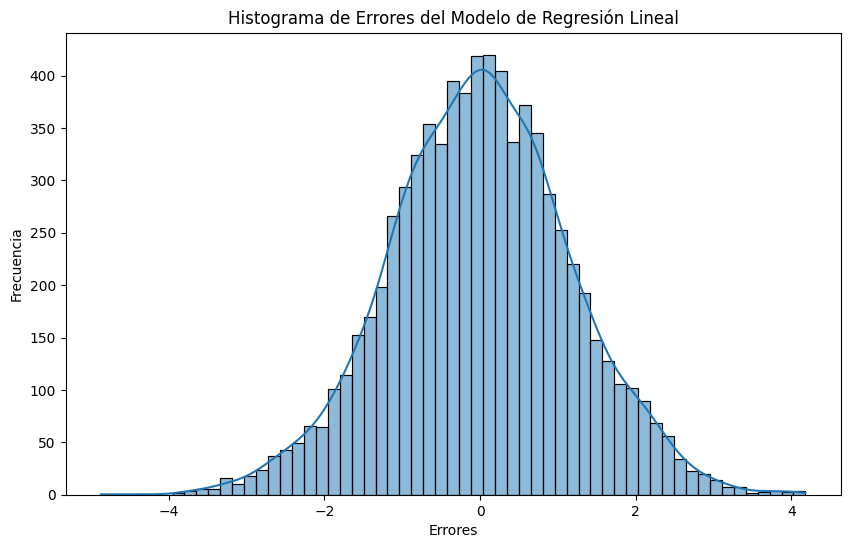

In [44]:
# Calculate the errors (residuals)
errors = y_test - y_pred

# Plot a histogram of the errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Histograma de Errores del Modelo de Regresión Lineal')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

In [45]:
# Calculate the mean and standard deviation of the errors
mean_error = errors.mean()
std_error = errors.std()

print(f"Media de los errores: {mean_error}")
print(f"Desviación estándar de los errores: {std_error}")

Media de los errores: 0.0005541229258411401
Desviación estándar de los errores: 1.1648508790719856


#REGRESIÓN MULTINOMIAL LOGISTICA

Predecir has_digital_wellbeing_enabled usando age, 'gender', 'job_type'  weekly_offline_hours_transformed, stress_level, actual_productivity_score, 'daily_social_media_time_transformed',

In [97]:
df_rl = df_copy[['age', 'gender', 'job_type', 'weekly_offline_hours_transformed',
               'stress_level', 'actual_productivity_score', 'daily_social_media_time_transformed',
               'has_digital_wellbeing_enabled']].copy()

display(df_rl.head())

,age,gender,job_type,weekly_offline_hours_transformed,stress_level,actual_productivity_score,daily_social_media_time_transformed,has_digital_wellbeing_enabled
0,0.808511,Male,Unemployed,0.838229,0.333333,0.732476,0.558943,False
1,0.595745,Male,Health,0.000000,0.666667,0.509797,0.491611,True
2,0.297872,Male,Finance,0.649414,0.333333,0.332715,0.473237,False
3,0.893617,Female,Unemployed,0.860068,0.555556,0.154779,0.473237,False
4,0.148936,Male,IT,0.657137,0.666667,0.487455,0.473237,True


In [98]:
df_rl['has_digital_wellbeing_enabled'].value_counts()

,count
has_digital_wellbeing_enabled,
False,22602
True,7398


In [99]:
df_rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  30000 non-null  float64
 1   gender                               30000 non-null  object 
 2   job_type                             30000 non-null  object 
 3   weekly_offline_hours_transformed     30000 non-null  float64
 4   stress_level                         30000 non-null  float64
 5   actual_productivity_score            30000 non-null  float64
 6   daily_social_media_time_transformed  30000 non-null  float64
 7   has_digital_wellbeing_enabled        30000 non-null  bool   
dtypes: bool(1), float64(5), object(2)
memory usage: 1.6+ MB


## Submuestreo de variable (Undersampling)

In [100]:
# Separate features (X) and target (y) from df_rl
X = df_rl.drop('has_digital_wellbeing_enabled', axis=1)
y = df_rl['has_digital_wellbeing_enabled']

# Identify categorical and numerical columns for undersampling
# We need to handle categorical columns before undersampling with RandomUnderSampler
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical features before applying RandomUnderSampler
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Display the shape of the original and resampled data
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)

# Display the value counts of the target variable after undersampling
print("\nValue counts of 'has_digital_wellbeing_enabled' after undersampling:")
y_resampled.value_counts()

Original dataset shape: (30000, 12) (30000,)
Resampled dataset shape: (14796, 12) (14796,)

Value counts of 'has_digital_wellbeing_enabled' after undersampling:


,count
has_digital_wellbeing_enabled,
False,7398
True,7398


In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  30000 non-null  float64
 1   weekly_offline_hours_transformed     30000 non-null  float64
 2   stress_level                         30000 non-null  float64
 3   actual_productivity_score            30000 non-null  float64
 4   daily_social_media_time_transformed  30000 non-null  float64
 5   gender_Male                          30000 non-null  bool   
 6   gender_Other                         30000 non-null  bool   
 7   job_type_Finance                     30000 non-null  bool   
 8   job_type_Health                      30000 non-null  bool   
 9   job_type_IT                          30000 non-null  bool   
 10  job_type_Student                     30000 non-null  bool   
 11  job_type_Unemployed         

##Modelo

In [102]:
# Las características (X_resampled) y la variable objetivo (y_resampled) ya están preparadas y submuestreadas

# Dividir los datos submuestreados en conjuntos de entrenamiento y prueba
# Usamos X_resampled y y_resampled
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

# Inicializar y entrenar el modelo de regresión logística
regresor_logistico = LogisticRegression(random_state=42)
regresor_logistico.fit(X_train_lr, y_train_lr)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = regresor_logistico.predict(X_test_lr)

###Matriz de confusión

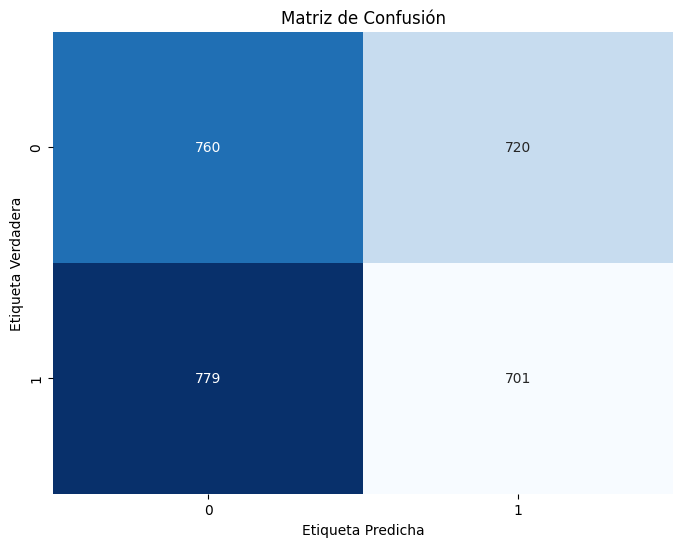


Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.49      0.51      0.50      1480
        True       0.49      0.47      0.48      1480

    accuracy                           0.49      2960
   macro avg       0.49      0.49      0.49      2960
weighted avg       0.49      0.49      0.49      2960



In [103]:
# Generar y mostrar la matriz de confusión
cm = confusion_matrix(y_test_lr, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Generar y mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_lr, y_pred_lr))

###Curva ROC (AUC)

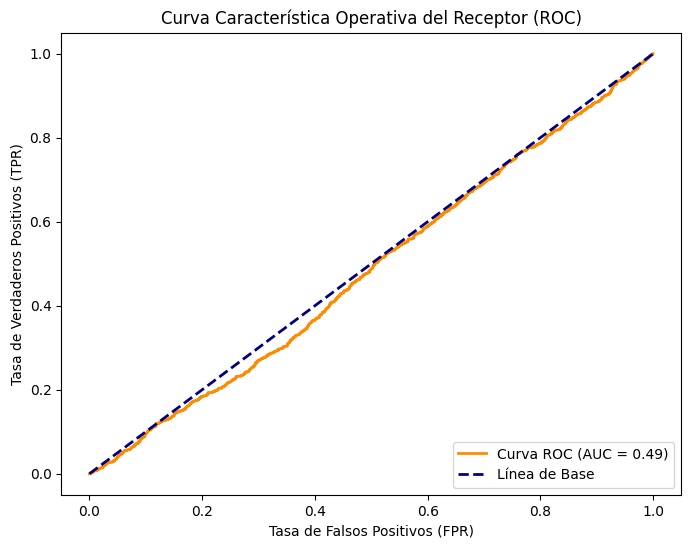


Área bajo la Curva ROC (AUC): 0.49


In [104]:
# Calcular la curva ROC y el área bajo la curva (AUC)
y_prob_lr = regresor_logistico.predict_proba(X_test_lr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_lr, y_prob_lr)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de Base')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"\nÁrea bajo la Curva ROC (AUC): {roc_auc:.2f}")

##Influencia de las variables

In [79]:
X_train_lr = sm.add_constant(X_train_lr)

In [81]:
# Convert boolean columns to integer type for statsmodels
boolean_cols = ['gender_Male','gender_Other','job_type_Finance','job_type_Health',
                'job_type_IT','job_type_Student','job_type_Unemployed']

X_train_lr[boolean_cols] = X_train_lr[boolean_cols].astype(int)

In [82]:
regresor_logistico = sm.Logit(y_train_lr, X_train_lr)
resultados_logisticos = regresor_logistico.fit()
print(resultados_logisticos.summary())

Optimization terminated successfully.
         Current function value: 0.692620
         Iterations 3
                                 Logit Regression Results                                
Dep. Variable:     has_digital_wellbeing_enabled   No. Observations:                11836
Model:                                     Logit   Df Residuals:                    11823
Method:                                      MLE   Df Model:                           12
Date:                           Wed, 24 Sep 2025   Pseudo R-squ.:               0.0007607
Time:                                   22:42:36   Log-Likelihood:                -8197.8
converged:                                  True   LL-Null:                       -8204.1
Covariance Type:                       nonrobust   LLR p-value:                    0.4078
                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

Al realizar el modelo sin las variables: weekly_offline_hours_transformed, actual_productivity_score, daily_social_media_time_transformed los valores de F1-SCORE y AUC son iguales

##Penalización e hiperparámetros

In [106]:
# Las características (X_train_lr, X_test_lr) y la variable objetivo (y_train_lr, y_test_lr)
# ya están divididas y preparadas a partir de los datos submuestreados.

# Eliminar la columna 'const' si existe, ya que scikit-learn la añade automáticamente
if 'const' in X_train_lr.columns:
    X_train_lr = X_train_lr.drop('const', axis=1)
if 'const' in X_test_lr.columns:
    X_test_lr = X_test_lr.drop('const', axis=1)


# Inicializar y entrenar el modelo de regresión logística con penalización ElasticNet
# Es necesario especificar un solver que soporte elasticnet como 'saga'
# También se necesita el hiperparámetro l1_ratio
regresor_logistico_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
regresor_logistico_elasticnet.fit(X_train_lr, y_train_lr)

# Realizar predicciones en el conjunto de prueba
y_pred_elasticnet = regresor_logistico_elasticnet.predict(X_test_lr)

# Generar y mostrar el reporte de clasificación
print("\nReporte de Clasificación con ElasticNet:")
print(classification_report(y_test_lr, y_pred_elasticnet))


Reporte de Clasificación con ElasticNet:
              precision    recall  f1-score   support

       False       0.49      0.51      0.50      1480
        True       0.49      0.47      0.48      1480

    accuracy                           0.49      2960
   macro avg       0.49      0.49      0.49      2960
weighted avg       0.49      0.49      0.49      2960



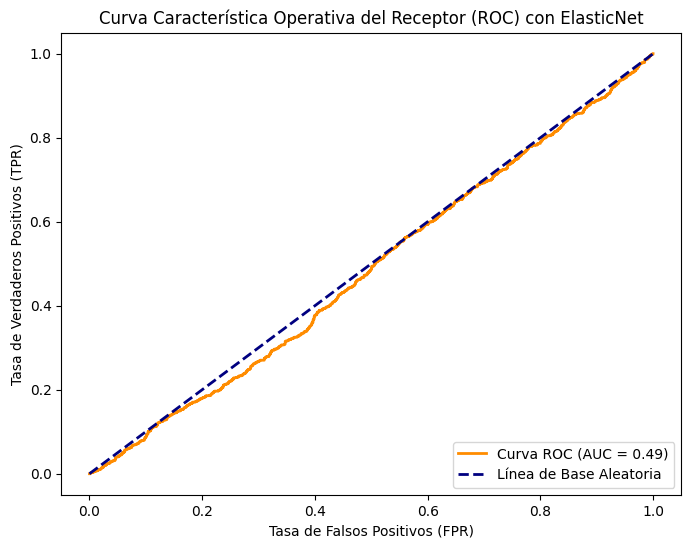


Área bajo la Curva ROC (AUC) con ElasticNet: 0.49


In [107]:
# Calcular las probabilidades predichas para la clase positiva (True)
y_prob_elasticnet = regresor_logistico_elasticnet.predict_proba(X_test_lr)[:, 1]

# Calcular la curva ROC
fpr_elasticnet, tpr_elasticnet, thresholds_elasticnet = roc_curve(y_test_lr, y_prob_elasticnet)

# Calcular el Área bajo la Curva (AUC)
roc_auc_elasticnet = auc(fpr_elasticnet, tpr_elasticnet)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_elasticnet, tpr_elasticnet, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_elasticnet:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de Base Aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva Característica Operativa del Receptor (ROC) con ElasticNet')
plt.legend(loc='lower right')
plt.show()

print(f"\nÁrea bajo la Curva ROC (AUC) con ElasticNet: {roc_auc_elasticnet:.2f}")